## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [43]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
# Read the CSV file with default column names
df = pd.read_csv('QueryResults.csv')
# Or df = pd.read_csv('your_file.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
# Rename columns
df.columns = ['DATE', 'TAG', 'POSTS']

# Display the first few rows of the DataFrame
print(df.head())


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
print(df.head())# look at first 5 rows of data
print(df.tail())#look at last 5 rows of data


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.shape
print("Rows, Column:", df.shape)

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
print("no. of entries in each column:")
print(df.count())

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
group_df= df.groupby('TAG').sum()
maxPost_df= group_df[group_df['POSTS']==group_df['POSTS'].max()]
print(maxPost_df)

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
month_df= df.groupby('TAG').count()
minMonth_df= month_df[month_df['DATE']==month_df['DATE'].min()]
print(minMonth_df)

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE']).dt.strftime('%Y-%m-%d')
print(df.head())

         DATE         TAG  POSTS
0  2008-07-01          c#      3
1  2008-08-01    assembly      8
2  2008-08-01  javascript    162
3  2008-08-01           c     85
4  2008-08-01      python    124


## Data Manipulation



In [ ]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df
print(reshaped_df.head())
print(reshaped_df.shape)


In [ ]:
reshaped_df.fillna(0, inplace=True)
print(reshaped_df.count())

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
plt.figure(figsize=(16, 10))

plt.plot(reshaped_df.index, reshaped_df['java'], label='java')

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Number of Posts Over Time in Java', fontsize=16)
plt.ylim(0, 35000)
plt.grid(True)
plt.legend()
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

In [ ]:
plt.figure(figsize=(16, 10))


for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column)

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Number of Posts Over Time in Java', fontsize=16)
plt.ylim(0, 35000)
plt.grid(True)
plt.legend()
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

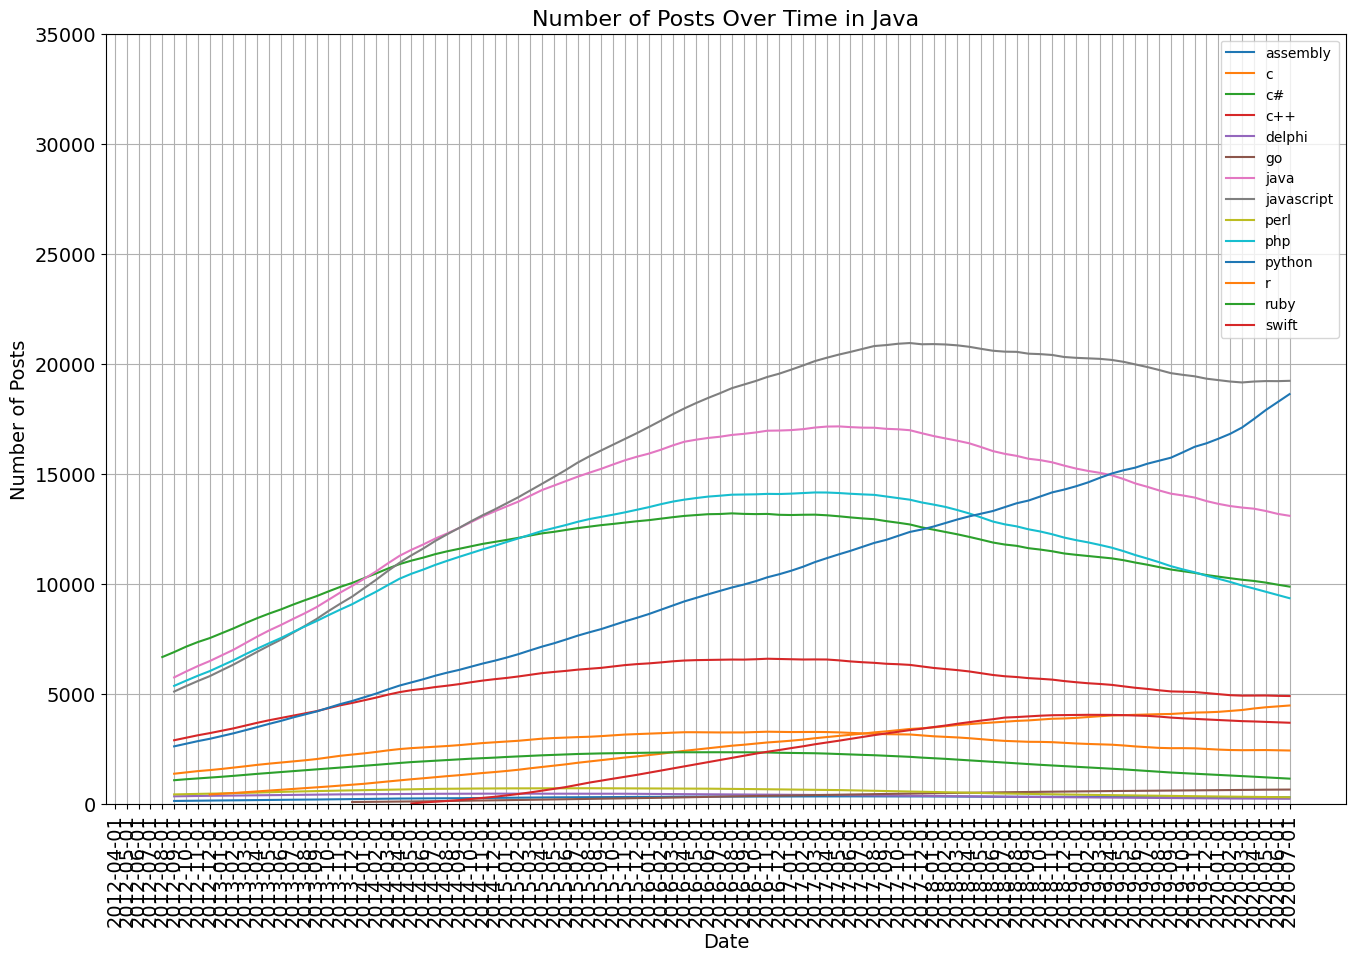

In [68]:
plt.figure(figsize=(16, 10))

#rolling and taking mean of database
rolled_df= reshaped_df.rolling(window=50).mean()

for column in rolled_df.columns:
    plt.plot(rolled_df.index, rolled_df[column], label=column)

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Number of Posts Over Time in Java', fontsize=16)
plt.ylim(0, 35000)
plt.grid(True)
plt.legend()
plt.show()